In [1]:
# Data manipulation
import pandas as pd
# Numeric
import numpy as np
# Neural networks
from tensorflow import keras
# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
# Plot
import matplotlib.pyplot as plt
%matplotlib inline

2023-10-03 23:28:21.283068: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-03 23:28:21.545800: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-03 23:28:21.545864: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-03 23:28:21.546836: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-03 23:28:21.574575: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-03 23:28:21.577099: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [8]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [9]:
print("Number of elements: ", len(X_train))
X_train

Number of elements:  60000


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
indexes = np.random.randint(0, X_train.shape[0], size=25)
images = X_train[indexes]
labels = Y_train[indexes]

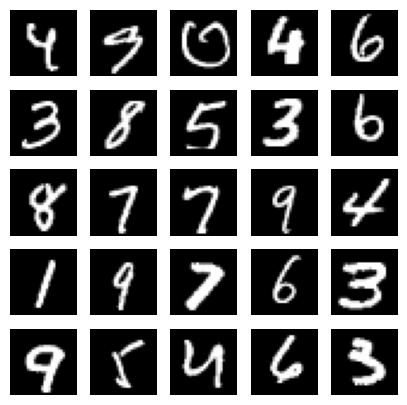

In [11]:
# images
plt.figure(figsize=(5,5)) # 25 mnist digits
for i in range(len(indexes)):
    plt.subplot(5, 5, i+1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()

### Importing Keras layers

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

In [13]:
num_labels = len(np.unique(Y_train))
print("number of train labels: ", num_labels)

number of train labels:  10


In [14]:
# converting to one-hot vector
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [15]:
# getting the image dimensions
image_size = X_train.shape[1]
input_size = image_size * image_size
print("Image size: ", input_size, "px")

Image size:  784 px


In [16]:
# resizing and normalizing
X_train = np.reshape(X_train, [-1, input_size])
X_train = X_train.astype('float32')/255
X_test = np.reshape(X_test, [-1, input_size])
X_test = X_test.astype('float32')/255

In [17]:
batch_size = 128
hidden_units = 256
dropout = 0.45

We will use MLP

In [18]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

In [20]:
# Compilation of model
model.compile(loss='categorical_crossentropy', # the negative of the sum of the product of the target and the logarithm of the prediction.
              optimizer='adam', 
              metrics=['accuracy'])

In [21]:
model.fit(X_train, Y_train, epochs=20, batch_size=batch_size)

Epoch 1/20


2023-10-03 20:47:02.073684: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 4s 6ms/step - loss: 0.4263 - accuracy: 0.8677
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1902 - accuracy: 0.9417
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1509 - accuracy: 0.9554
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1314 - accuracy: 0.9607
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1141 - accuracy: 0.9650
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1015 - accuracy: 0.9683
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0918 - accuracy: 0.9717
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0889 - accuracy: 0.9716
Epoch 9/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0811 - accuracy: 0.9744
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0770 - accuracy: 0.9757
Epoch 11/2

In [22]:
loss, accuracy = model.evaluate(X_test, Y_test, batch_size = batch_size)
print("\nAccuracy: %.2f%%" %(100.0 * accuracy))

79/79 [==============================] - 1s 3ms/step - loss: 0.0614 - accuracy: 0.9823

Accuracy: 98.23%


In [23]:
from keras.regularizers import l2 # The regularization is imposed in the Dense layer internally.
model.add(Dense(hidden_units,
                kernel_regularizer=l2(0.001), # regularization penalty to the loss
                input_dim=input_size))